<a href="https://colab.research.google.com/github/RichardTesla/datal/blob/main/Exploring_Alternative_Pricing_Methods(Monte_Carlo%2CBlack_Scholes)_for_Financial_Instruments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Work Project II

|  |  |
|:---|:---|
|**Name** |  Carolina Magda Roma, Siddeshkanth Logonathan, Chizaram Onukwufor  |
|**Prior Knowledge** |Derivative pricing, Black-Scholes model, Monte Carlo simulation, Python    |
|**Keywords** |Put option, call option, european x american x exotic options,simulation  |

# **Step 1**

Q1.



*   GWP 1 - Q5



In [ ]:
#@title #### BS model in Python

# Black-Scholes model in Python
import numpy as np
import scipy.stats as ss

# Data for input in Black-Scholes formula:
def bs_pricing(S, K, r, vol, T, option_type, t = 0):

 T = T-t # time to maturity

 # Compute d1 and d2
 d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
 d2 = d1 - vol * np.sqrt(T)

 if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
 else:
  Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

 return Opt_Price, Delta, Gamma, Vega, Theta, Rho



In [ ]:
#@title ###### Price the ATM European Call and Put

T = 0.25
S = 100
K = 100
r = 0.05
vol = 0.20
# dividend yield assumed to be 0

# Inputs S, K, r, vol, T, option_type

eurocall = round(bs_pricing(S, K, r, vol, T, "C", 0)[0],2)
print('Price of european call option using Black-Scholes Model is $', eurocall)

europut = round(bs_pricing(S, K, r, vol, T,"P", 0)[0],2)
print('Price of european put option using Black-Scholes Modelis $', europut)


Price of european call option using Black-Scholes Model is $ 4.61
Price of european put option using Black-Scholes Modelis $ 3.37


The seminal work of Black-Scholes (BS) provides us exact formulas to price european call and put option prices. The intuion is that a position in an underlying asset and derivative will result in the risk-free rate (rf). Their gains and losses will offset each other and the will result in rf. However, in order to keep this riskless position, it is necessary to adjust the portfolio exposition (the delta will tell us whether we need to buy/sell more of the underlying asset). They assume that changes in stock prices for a short period of time are normally distributed as well as mean and volatility are constant, there are no transactions or costs, no dividends during the life of the derivative, no riskless arbitrage opportunities, trading of the asset is continuous and the risk-free rate is the same for different maturities and it is constant (Hull, p. 286 - 287). It is important to highlight that the BS model does not take into account any risk preference, thus all investors expect to recieve rf and rf will also be used to discount the cash flows. This gives rise to the risk-neutral valuation. As pointed by Hull (p. 292), the exact pricing equations of the BS model can be obtained by solving their differential equation taking into account the boundary conditions (max(S - K,0) or max(K-S, 0), where S is the stock price of the underlying asset and K is the strike price) or by the risk-neutral valuation. In addition, because early exercise is nevel optimal for American options, its price is the same for the european counterpart. For puts, early exercise may or may not be appropriate.

*   GWP 1 - Q6



In [ ]:
#@title #

eurocalldelta = round(bs_pricing(S, K, r, vol, T,"C",0)[1],2)
print('Delta for european call option at time t=0', eurocalldelta)

europutdelta = round(bs_pricing(S, K, r, vol, T,"P",0)[1],2)
print('Delta for european put option at time t=0', europutdelta)

Delta for european call option at time t=0 0.57
Delta for european put option at time t=0 -0.43


They compare in the sense of their meaning: they inform us the sensitivity of option prices to the underlying asset, therefore they provide a result about how we have to adjust our position in the underlying asset to keep our portfolio protected.  

In addition, as explained in GWP 1, we can see that the delta for the call option is basically positive whereas it is negative for put. For example, at time t=0, it corresponds to 0.57 and -0.43, respectively. This means that for the call option, If I am the seller, I should buy 0.57 fraction of the underlying stock to protect me against changes in the stock price. On the other hand, for the put option I should sell a fraction of 0.43 of the underlying stock price for the same purpose, i.e, in order to seek protection for my position. It is important to note that we are assuming that fractions of the underlying asset can be traded. And, again, yes it makes sense that they have different signs as a negative sign is expected for put options.



*   GWP1 - Q7



In [ ]:
#@title #

vol = 0.25
eurocall_sig25 = round(bs_pricing(S, K, r, vol, T,"C",0)[0],2)
print('Price of european call option using Black-Scholes Model and sigma = 25% is $', eurocall_sig25)

europut_sig25 = round(bs_pricing(S, K, r, vol, T,"P",0)[0],2)
print('Price of european put option using Black-Scholes Model and sigma = 25% is $', europut_sig25)


# Vega from BS
vol = 0.20
eurocallvega = round(bs_pricing(S, K, r, vol, T,"C",0)[3],2)
print('Vega of european call option using Black-Scholes Model', eurocallvega)

europutvega = round(bs_pricing(S, K, r, vol, T,"C",0)[3],2)
print('Vega of european put option using Black-Scholes Model', europutvega)

Price of european call option using Black-Scholes Model and sigma = 25% is $ 5.6
Price of european put option using Black-Scholes Model and sigma = 25% is $ 4.36
Vega of european call option using Black-Scholes Model 19.64
Vega of european put option using Black-Scholes Model 19.64


When we change the volatility parameter to 25%, the european call price increases to \$ 5.60 and the put price increases to \$ 4.36. In general, the vega for both is 19.64 and it captures the sensitivity of the option prices to changes in volatility. Given the put-call parity, the vega is also the same for both call and put options.

As discussed in GWP 1, when we face more volatility, the chances that the option will be exercise increase, then the option premium also increases to reflect this possible event. Also, when volatility increases it can bring more downward behavior for the stock prices, this results in a higher sensitivity for the put option, leading to a greater percentage change in put option prices than for call prices. Specifically, the european call price increased by 21.48% whereas the european put price increased by 29.38%.


Q2.

In [ ]:
#@title #

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [ ]:
#@title #### Pricing European Call and Put using Monte Carlo

def bs_call_mc(S, K, r, sigma, T, t, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    data[:, 1] = ST - K
    average = np.sum(np.amax(data, axis=1)) / float(Ite)

    return np.exp(-r * (T - t)) * average

def bs_put_mc(S, K, r, sigma, T, t, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    data[:, 1] = K - ST
    average = np.sum(np.amax(data, axis=1)) / float(Ite)

    return np.exp(-r * (T - t)) * average

In [ ]:
#@title #

S0 = 100
r = 0.05
sigma = 0.2
T = 0.25
K = 100
Ite = 10000

In [ ]:
#@title #

call_values = []
for i in range(500, 200000, 500):
    v = bs_call_mc(S=S0, K=100, r=r, sigma=sigma, T=T, t=0, Ite=i)
    call_values.append([i, v])

call_values = np.stack(call_values)

put_values = []
for i in range(500, 200000, 500):
    v = bs_put_mc(S=S0, K=100, r=r, sigma=sigma, T=T, t=0, Ite=i)
    put_values.append([i, v])

put_values = np.stack(put_values)

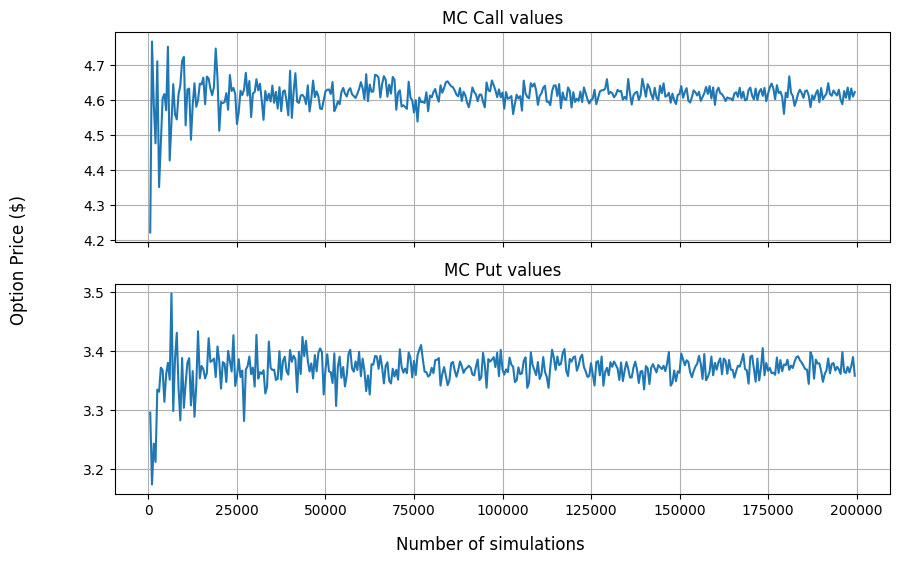

In [ ]:
#@title #

fig, ax = plt.subplots(2,1,figsize=(10,6), sharex=True)
ax[0].plot(call_values[:,0], call_values[:,1])
ax[1].plot(put_values[:,0], put_values[:,1])
for a in ax:
    a.grid()

ax[0].set_title('MC Call values')
ax[1].set_title('MC Put values')
fig.supxlabel('Number of simulations')
fig.supylabel('Option Price ($)')
plt.show()

In [ ]:
#@title #

mc_eurocall = bs_call_mc(S0, K, r, sigma, T, 0, 100000)

mc_europut = bs_put_mc(S0, K, r, sigma, T, 0, 100000)

print('European call price with Monte Carlo simulation is $', round(mc_eurocall, 2))

print('European put price with Monte Carlo simulation is $', round(mc_europut, 2))


European call price with Monte Carlo simulation is $ 4.61
European put price with Monte Carlo simulation is $ 3.38


5. \

    a.   The N that we will pick is N = 100000. \
    b.   We can see that the N is converging towards $4.6 for the call option and \$3.38 for the put option. Any N before that results is more noisy behaviour.

6. To compute the delta for an MC based approach, we can bump the underlying price by a small value (for example 1%) and recalculate the option price and then computing the delta by getting the ratio of changes between the option price to the change in bump.



In [ ]:
#@title #

N = 100000

In [ ]:
#@title #

np.random.seed(1000)
v_n = bs_call_mc(S=S0, K=100, r=r, sigma=sigma, T=T, t=0, Ite=N)
v_bump = bs_call_mc(S=S0+1, K=100, r=r, sigma=sigma, T=T, t=0, Ite=N)

In [ ]:
#@title #

call_delta = (v_bump - v_n)/(S0+1 - S0)

In [ ]:
#@title #

np.random.seed(1000)
v_n = bs_put_mc(S=S0, K=100, r=r, sigma=sigma, T=T, t=0, Ite=N)
v_bump = bs_put_mc(S=S0+1, K=100, r=r, sigma=sigma, T=T, t=0, Ite=N)

In [ ]:
#@title #

put_delta = (v_bump - v_n)/(S0+1 - S0)

In [ ]:
#@title #

print(f'Call delta: {round(call_delta, 2)}')
print(f'Put delta: {round(put_delta, 2)}')

Call delta: 0.58
Put delta: -0.43


6. \

    a. We can see that for the call option, the delta is much larger than the put option. Hence for the call option, we need to hold a larger percentage of share in comparison to the put option.

    b. The positive magnitude of the delta means that we are bullish on the stock and the negative sign means that we are bearish, expecting the stock price to go down. As the stock price goes down, the delta values moves towards -1 as the option is more and more likely to be exercised.

7. We will calculate the Vega for the options, which explains the sensitivity to the change in volatility of the underlying.

In [ ]:
#@title #

v_normal_call = bs_call_mc(S=S0, K=100, r=r, sigma=sigma, T=T, t=0, Ite=N)
v_vol_bump_call = bs_call_mc(S=S0, K=100, r=r, sigma=sigma+0.05, T=T, t=0, Ite=N)
print('European Call price using Monte Carlo with sigma equal to 25% is $', round(v_vol_bump_call, 2))

v_normal_put = bs_put_mc(S=S0, K=100, r=r, sigma=sigma, T=T, t=0, Ite=N)
v_vol_bump_put = bs_put_mc(S=S0, K=100, r=r, sigma=sigma+0.05, T=T, t=0, Ite=N)
print('European Put price using Monte Carlo with sigma equal to 25% is $', round(v_vol_bump_put, 2))

European Call price using Monte Carlo with sigma equal to 25% is $ 5.6
European Put price using Monte Carlo with sigma equal to 25% is $ 4.37


In [ ]:
#@title #

sensitivity_call = round((v_vol_bump_call - v_normal_call) / v_normal_call, 4)
sensitivity_put = round((v_vol_bump_put - v_normal_put) / v_normal_put, 4)

sensitivity_call, sensitivity_put

(0.2037, 0.2943)

a. For a 5% rise in volatility, the call option price rose by 20.37% and the put option price rose by 29.43%

In [ ]:
#@title #

def get_vega_value(S, K, T, vol):
    # Compute d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    vega = S * ss.norm.pdf(d1) * np.sqrt(T)
    return vega


In [ ]:
#@title #

vega = get_vega_value(S=S0, K=100, T=T, vol=sigma)
round(vega, 2)

19.64

b. The vega is 19.64. As explained in GWP1, we know that increase in volatility increases the value of the option, hence causing the options to be worth more. However, again, this sensitivity (vega) is higher for put options, which will benefit more from large downward movements in the underlying stock price.

  ## Q3.


In [ ]:
#@title #### Test for Put-Call Parity for BS - European Options
print(eurocall)
print(europut)
print(eurocall+S*np.exp(-r*T))
print(europut+S)
print('Test for put-call parity')
test_put_call_parity = round(eurocall + 100 * np.exp(-0.05 * 0.25), 2) == round(S + europut, 2)
print(f'Put-Call parity test: {test_put_call_parity}')


4.61
3.37
103.36778004938814
103.37
Test for put-call parity
Put-Call parity test: True


In [ ]:
#@title #

import math
put_call_parity_difference = europut + S - eurocall - K * math.exp(-r * T)
round(eurocall + 100 * np.exp(-0.05 * 0.25), 2) == round(S + europut, 2)
print("Difference in Put-Call Parity for European Options:", round(put_call_parity_difference,2))

Difference in Put-Call Parity for European Options: 0.0


In [ ]:
#@title #### Test for Put-Call Parity for MC - European Options
print(mc_eurocall)
print(mc_europut)
print(mc_eurocall+S*np.exp(-r*T))
print(mc_europut+S)
print('Test for put-call parity')
test_put_call_parity = round(mc_eurocall + 100 * np.exp(-0.05 * 0.25), 2) == round(100 + mc_europut, 2)
print(f'Put-Call parity test: {test_put_call_parity}')


4.611565012798775
3.3795071855037877
103.36934506218692
103.37950718550378
Test for put-call parity
Put-Call parity test: False


In [ ]:
#@title #

import math
put_call_parity_difference = mc_europut + S - mc_eurocall - K * math.exp(-r * T)
round(mc_eurocall + 100 * np.exp(-0.05 * 0.25), 2) == round(S + mc_europut, 2)
print("Difference in Put-Call Parity for European Options:", round(put_call_parity_difference,2))

Difference in Put-Call Parity for European Options: 0.01


a. There is a put-call parity from the Black-Scholes pricing method whereas when using MC, there is an absent of Put-Call parity, but the magnitude of this difference is very small and dependent on the simulation.

b. For MC, when the number of simulations increases, the results converge as we also saw in the last live lecture. A simulation of 100 million iterations, we saw the prices converging for the Black-Scholes and MC in option pricing. It is important to highlight that the number of iterations must be sufficient large for this purpose.

# **Step 2**

Q4.



*   GWP 1 Q5
*   GWP 1 Q6
*   GWP 1 Q7



Please, check the 'Extra Alternatives' section presented in the end of this material to check for ***two more valid alternative solutions*** for the purpose of pricing american call and american call and put options, respectively.





In [ ]:
#@title #

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import numpy.random as npr
from scipy.stats import norm

In [ ]:
#@title ### American Call Price

def bs_mc_american(S0,K,r, sigma, T, M, Ite, opttype = ''):
  dt = T / M

  # compute underlying price evolution
  S = np.zeros((M + 1, Ite))
  S[0] = S0

  for t in range(1, M + 1):
      S[t] = S[t - 1] * np.exp(
          (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(Ite)
      )

  # computing price of american option
  C = np.zeros((M + 1, Ite))
  Deltas = np.zeros((M, Ite))

  if opttype == 'C':
    C[M] = np.maximum(S[M] - K,0)
    for i in range(M-1,-1,-1):
        C[i] = np.maximum(bs_pricing(S = S[i], K = K, r = r, vol = sigma , T = T, option_type = opttype , t = dt*i)[0], S[i]-K)

  elif opttype == 'P':

    C[M] = np.maximum(K - S[M],0)
    for i in range(M-1,-1,-1):
        C[i] = np.maximum(bs_pricing(S = S[i], K = K, r = r, vol = sigma , T = T, option_type = opttype , t = dt*i)[0], K - S[i])

  else:
    return print('Please review your input, opttype must be C or P')

  for i in range(M):
    Deltas[i] = (C[i+1]-C[i])/(S[i+1]-S[i])

  return C[0].mean(), S, C, Deltas

In [ ]:
#@title #

# Inputs S, K, r, vol, T, option_type, t

S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 3/12
Ite = 1000000
M = 90

# S0,K,r, sigma, T, M, Ite, opttype = 'C'
call_mc_ame, S, C,Deltas = bs_mc_american(S0 = S0, K = K ,r = r, sigma = sigma, T = T, M = M, Ite = Ite, opttype = 'C')
print('American Call Price using Monte Carlo is $', round(call_mc_ame,2))

American Call Price using Monte Carlo is $ 4.61


In [ ]:
#@title #### Delta and Vega are obtained via the finite difference method (by shocking the underlying price and sigma, respectively, up and down)

def approx_delta(S, K, r, sigma, T, M, Ite, dS):
  amecall_inc = bs_mc_american(S0 = S0+dS/2, K = K ,r = r, sigma = sigma, T = T, M = M, Ite = Ite, opttype = 'C')[0]
  amecall_dec = bs_mc_american(S0 = S0-dS/2, K = K ,r = r, sigma = sigma, T = T, M = M, Ite = Ite, opttype = 'C')[0]
  delta = (amecall_inc - amecall_dec) / dS
  return delta

def approx_vega(S, K, r, sigma, T, t, Ite, dvol):
  amecall_inc = bs_mc_american(S0 = S0, K = K ,r = r, sigma = sigma+dvol/2, T = T, M = M, Ite = Ite, opttype = 'C')[0]
  amecall_dec = bs_mc_american(S0 = S0, K = K ,r = r, sigma = sigma-dvol/2, T = T, M = M, Ite = Ite, opttype = 'C')[0]
  vega = (amecall_inc - amecall_dec) / dvol
  return vega


In [ ]:
#@title #### Delta
delta_amecall = approx_delta(100, 100, 0.05, 0.20, 0.25, M, Ite, 1)
print(round(delta_amecall,2))

0.57


In [ ]:
#@title #### American Call Price when Volatility is 25%

T = 0.25
S0 = 100
K = 100
r = 0.05
sigma = 0.25
# dividend yield assumed to be 0
Ite = 1000000
M = 90

call_mc_ame_sigma25 = bs_mc_american(S0 = S0,K = K,r = r, sigma = sigma, T = T, M = M, Ite = Ite, opttype = 'C')[0]
print('American Call Price using Monte Carlo when sigma is equal to 25% is $', round(call_mc_ame_sigma25,2))

American Call Price using Monte Carlo when sigma is equal to 25% is $ 5.6


In [ ]:
#@title #### Vega
vega_amecall = approx_vega(100, 100, 0.05, 0.20, 0.25, M, Ite, 0.05)
print(round(vega_amecall,2))

19.64


It is possible to see that these values (call price, delta and vega) are close to those obtained via analytical solution (BS formulas). In addition, the impact of prices or volatility going up and down are not the same (are not symmetrical) in terms of delta and vega. Then, we use the approximation for both sides.

Q5

In [ ]:
#@title Using Monte Carlo methods with regular GBM process to price an American Put option.

S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 90
M = 100000

In [ ]:
# @title Pricing an American Put option using
def american_put_mc_option(S0, K, r, T, sigma, N, M):
    dt = T/N

    # Generating Stock prices
    S = np.zeros((M,N+1))
    C = np.zeros((M,N+1))

    S[:,0] = S0
    for i in range(1, N+1):
        S_prev = S[:,i-1]
        z = np.random.normal(0,1,size=(M))
        S_i = S_prev*np.exp((r-0.5*sigma**2)*dt + sigma * z * np.sqrt(dt))
        S[:,i] = S_i

    # Pricing the option Initialization
    option_payoffs = np.maximum(K-S, 0)
    C[:, -1] = option_payoffs[:,-1]
    discount_factor = np.exp(-r*dt)

    # Option pricing
    for i in range(N-1, -1, -1):
        option_intrinsic_value = C[:,i+1]
        option_holding_value = discount_factor*C[:, i+1]
        C[:,i] = np.maximum(option_holding_value, option_intrinsic_value)
    return C[:,0].mean(), C, S


In [ ]:
#@title #

option_price, C, S = american_put_mc_option(S0, K, r, T, sigma, N, M)

In [ ]:
#@title #

print(f'American Put option price: ${round(option_price, 2)}')

American Put option price: $3.42


We get the delta by shocking the underlying stock price at t = 0 by $1 and comput the sensitivity of the option price to the stock price

In [ ]:
#@title #### Calculating Delta and Vega obtained via the finite difference method

def approx_delta(S0, K, r, sigma, T, t, M, dS):
  american_put_inc, _, _ = american_put_mc_option(S0+dS/2, K, r, T, sigma, N, M)
  american_put_dec, _, _ = american_put_mc_option(S0-dS/2, K, r, T, sigma, N, M)
  delta = (american_put_inc - american_put_dec) / dS
  return delta

def approx_vega(S0, K, r, sigma, T, t, M, dVol):
  american_put_inc, _, _ = american_put_mc_option(S0, K, r, T, sigma+dVol/2, N, M)
  american_put_dec, _, _ = american_put_mc_option(S0, K, r, T, sigma-dVol/2, N, M)
  vega = (american_put_inc - american_put_dec) / dVol
  return vega


In [ ]:
#@title #

np.random.seed(1000)
delta_value = approx_delta(S0, K, r, sigma, T, t, M, dS=1)
print(f'Delta value is: {delta_value}')

Delta value is: -0.4375701378348653


In [ ]:
#@title #### American Put Option with Volatility equal to 25%

option_price, _, _ = american_put_mc_option(S0, K, r, T, sigma, N, M)
d_vol = 0.05
option_price_vol_shocked, _, _ = american_put_mc_option(S0, K, r, T, sigma+d_vol, N, M)

In [ ]:
#@title #

# If sigma increases to 25%, then the american put price will be:
print(f'Price of American Put Option with sigma equal to 25% is $: {round(option_price_vol_shocked, 2)}')


Price of American Put Option with sigma equal to 25% is $: 4.43


In [ ]:
#@title #

np.random.seed(1000)
vega_value = approx_vega(S0, K, r, sigma, T, t, M, dVol=0.05)
print(f'Vega value is: {round(vega_value,2)}')

Vega value is: 19.8


It is possible to see that the prices and deltas are alligned with those results obtained using binomial tree for GWP1. This occurs because we are using a sufficient large number of iterations for our simulations.

In addition, when volatility increases, the american put option price also increases which is in accordance with the expected behavior.

Q6.

In [ ]:
#@title ### Price options for different levels of moneyness for American Call and Put
import numpy as np

def bs_call_mc(S, K, r, sigma, T, t, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    data[:, 1] = ST - K
    average = np.sum(np.amax(data, axis=1)) / float(Ite)
    return np.exp(-r * (T - t)) * average

def bs_put_mc(S, K, r, sigma, T, t, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    data[:, 1] = K - ST
    average = np.sum(np.amax(data, axis=1)) / float(Ite)
    return np.exp(-r * (T - t)) * average


T = 0.25
S0 = 100
moneyness_ratio = [0.9, 0.95, 1, 1.05, 1.10]
r = 0.05
sigma = 0.20
t = 0  # (present day)
# dividend yield assumed to be 0
Ite = 1000000

# Calculate option prices for different moneyness levels
option_prices_call = []
for ratio in moneyness_ratio:
    K = S0 * ratio
    option_price = bs_call_mc(S0, K, r, sigma, T, t, Ite)
    option_prices_call.append(option_price)

option_prices_put = []
for ratio in moneyness_ratio:
  K = S0 * ratio
  option_price = bs_put_mc(S0, K, r, sigma, T, t, Ite)
  option_prices_put.append(option_price)

# Print the american call and put option prices
for i, ratio in enumerate(moneyness_ratio):
    strike = S0 * ratio
    print(f"Option price for call with strike {round(strike, 2)}: ${round(option_prices_call[i], 2)} and put: ${round(option_prices_put[i], 2)}")


Option price for call with strike 90.0: $11.68 and put: $0.55
Option price for call with strike 95.0: $7.71 and put: $1.54
Option price for call with strike 100: $4.62 and put: $3.39
Option price for call with strike 105.0: $2.48 and put: $6.18
Option price for call with strike 110.0: $1.19 and put: $9.83


\

\

\

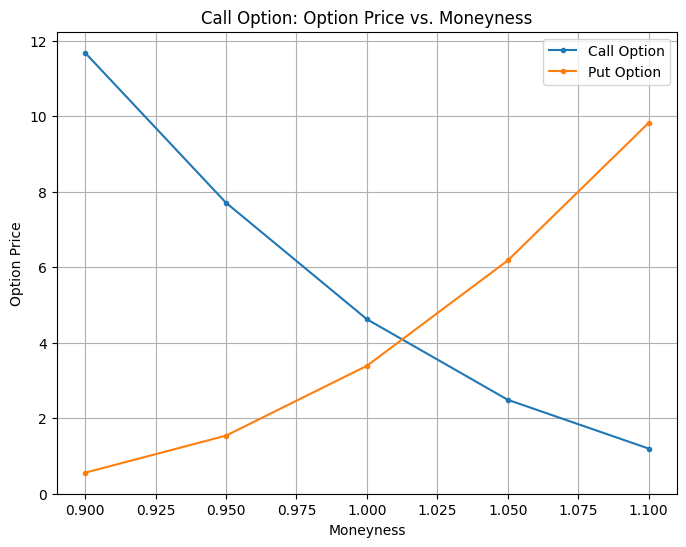

In [ ]:
#@title #

import matplotlib.pyplot as plt

# Plotting the relationship between option price and moneyness for American option
plt.figure(figsize=(8, 6))
plt.plot(moneyness_ratio, option_prices_call, label='Call Option', marker='.')
plt.plot(moneyness_ratio, option_prices_put, label='Put Option', marker='.')
plt.xlabel('Moneyness')
plt.ylabel('Option Price')
plt.title('Call Option: Option Price vs. Moneyness')
plt.legend()
plt.grid(True)
plt.show()

b. There is a clear decreasing trend whereby when the Strike Price increases for the call, the option price gets cheaper and the opposite for the put option. When the Strike price increases, the value of the put option increases, as we are able to sell it for higher at expiration if the stock price falls.

# **Step 3**

Q7.


In [ ]:
#@title ###### Price European Call option with 110% moneyness and an European Put with 95% moneyness using BS

T = 0.25
S = 100
K_call = 110
K_put = 95
r = 0.05
vol = 0.20
# dividend yield assumed to be 0

# Inputs S, K, r, vol, T, option_type

eurocall_itm = round(bs_pricing(S, K_call, r, vol, T, "C")[0],2)
print('Price of european call option using Black-Scholes Model is $', eurocall_itm)

europut_otm = round(bs_pricing(S, K_put, r, vol, T,"P")[0],2)
print('Price of european put option using Black-Scholes Model is $', europut_otm)


Price of european call option using Black-Scholes Model is $ 1.19
Price of european put option using Black-Scholes Model is $ 1.53


In [ ]:
#@title ###### Delta of European Call option with 110% moneyness and an European Put with 95% moneyness using BS

eurocalldelta_itm = round(bs_pricing(S, K_call, r, vol, T,"C")[1],2)
print('Delta for european call option with 110% moneyness at time t=0', eurocalldelta_itm)

europutdelta_otm = round(bs_pricing(S, K_put, r, vol, T,"P")[1],2)
print('Delta for european put option with 95% moneyness at time t=0', europutdelta_otm)

# Portfolio consisting of buying one of this call and put
deltasp = eurocalldelta_itm + europutdelta_otm
print('Delta of the portfolio at time t=0', deltasp)

Delta for european call option with 110% moneyness at time t=0 0.22
Delta for european put option with 95% moneyness at time t=0 -0.25
Delta of the portfolio at time t=0 -0.03


In [ ]:
#@title #

import pandas as pd

deltasmoney = pd.DataFrame(np.c_[eurocalldelta_itm,europutdelta_otm, deltasp])
deltasmoney.rename(columns={0: 'Call Delta', 1: 'Put Delta', 2: 'Portfolio Delta' }, inplace=True)
deltasmoney.index = ['t=0']
print(deltasmoney)

     Call Delta  Put Delta  Portfolio Delta
t=0        0.22      -0.25            -0.03


b) Our portfolio consists of buying one call with strike equal to \$91 and one put with strike equal to \$95. In this sense, this supposes that we are trading volatility (volatility trader) and the name of this strategy is (long) straddle. Basically, straddle refers to buying one call and one put with different strike prices.

Let's first understand how this strategies apply to our portfolio. It means that if prices at the maturity is in the range of \$95 to \$110, we loose money as both options are out-of-money and will not exercised. The premium will be lost. In contrast, if prices are below \$95 at maturity, the put option will be exercised whereas the call option will expire worthless. The opposite effect is expected if the underlying asset price is above \$110. It is important to highlight that although the option can be exercised, if the price do not move enough, it may not be sufficient to cover the premium paid.   

Our portfolio has negative delta of -0.03. It is slighthly negative as the call and put delta are close, but in opposite directions. This means that our portfolio position will decrease by 0.03 cents by each \$1 change in the underlying asset. In order to delta hedge (create a delta neutral) our position, we have to hold a fraction of 0.03 of the underlying asset (long position). Specifically, the call contract represents 100 shares, then (1 * 0.22 * 100) I would need to sell 22 shares; for the put contract, I would need to buy (1 * -0.25 * 100) 25 shares; the net result is that I need to buy (1 * -0.03 * 100) 3 shares. This portfolio would be delta hedged on a weekly frequency in order to find a balance between costs and protection.

c) Now, we buy the call and sell the put. Thus, we pay the premium for the former and receive the premium for the latter. If price at maturity is in the range of \$95 to \$110, I'll collect the difference in the premiums. If prices increase above \$110, the call will be exercised and the put won't. In this case, I will get the difference in prices for the call contract and, in addition, I will have collected the premium for my short position. However, the problem arises when prices fall. As the price decreases below \$95, the holder will exercise the option and my losses will increase. The worst case scenario is prices going to zero (as there is no negative price). The call option experies worthless and I would have a net output equal to payment of the difference between strike-underlying price plus premium paid for the call less premium collected for shorting the put), which would be negative. This highlights the importance of delta hedging our position. In this sense, the neative portfolio delta equal to -0.03 represents that I should sell a fraction of 0.03 of the underlying asset (3 shares) to protect me against declines in price. Because of my short position in the put, the interpretation changes. As shown in question 25 of GWP 1, we collect the money from this trading and invest it at the risk-free rate. In this sense, we can offset this contrary move in prices by delta hedging our portfolio. This portfolio would also be delta hedged on a weekly frequency in order to find a balance between costs and protection.


Q8.

Up-and-Out (UAO) Barrier Option is an option that's value ceases to exit if then underlying price crosses the barrier level at expiration. If it doesn't cross the barrier level, the holder of the option has the right to exercise the option as a normal vanilla option before and on the strike date. Pricing an UAO option using monte carlo will be the following.

In [ ]:
# @title ### Pricing an Up-And-Out Barrier Option
def UAO_option(S0, K, B, r, T, sigma, N, M):
    dt = T/N

    # Generating Stock prices
    S = np.zeros((M,N+1))
    C = np.zeros((M,N+1))

    S[:,0] = S0
    for i in range(1, N+1):
        S_prev = S[:,i-1]
        z = np.random.normal(0,1,size=(M))
        S_i = S_prev*np.exp((r-0.5*sigma**2)*dt + sigma * z * np.sqrt(dt))
        S[:,i] = S_i

    # Pricing the option Initialization
    option_expiration_value = np.maximum(S[:, -1]-K, 0)
    option_expiration_value[option_expiration_value > B-K] = 0
    C[:, -1] = option_expiration_value
    discount_factor = np.exp(-r*dt)

    # Option pricing
    for i in range(N-1, -1, -1):
        option_intrinsic_value = np.maximum(S[:, i]-K,0)
        option_intrinsic_value[option_intrinsic_value > B-K] = 0
        option_holding_value = discount_factor*C[:, i+1]
        C[:,i] = np.maximum(option_holding_value, option_intrinsic_value)
    return C[:,0].mean(), C, S


In [ ]:
# @title #

S0 = 120
K = 120
r = 0.06
sigma = 0.3
T = 8/12

N = 252
M = 10000
B = 141

call_value, C, S = UAO_option(S0=S0, K=K,B=B, r=r, T=T, sigma=sigma, N=N, M=M)
print(f'The Call value of the UAO option is: ${round(call_value, 2)}')

The Call value of the UAO option is: $14.64


Q9.

In [ ]:
# @title ### Pricing an Up-and-In barrier (UAI)

def UAI_option(S0, K, B, r, T, sigma, N, M, set_barrier=True):
    dt = T/N

    # Generating Stock prices
    S = np.zeros((M,N+1))
    C = np.zeros((M,N+1))

    S[:,0] = S0
    for i in range(1, N+1):
        S_prev = S[:,i-1]
        z = np.random.normal(0,1,size=(M))
        S_i = S_prev*np.exp((r-0.5*sigma**2)*dt + sigma * z * np.sqrt(dt))
        S[:,i] = S_i

    # Pricing the option Initialization
    option_expiration_value = np.maximum(S[:, -1]-K, 0)
    if set_barrier:
      option_expiration_value[option_expiration_value < B-K] = 0
    C[:, -1] = option_expiration_value
    discount_factor = np.exp(-r*dt)

    # Option pricing
    for i in range(N-1, -1, -1):
        option_intrinsic_value = np.maximum(S[:, i]-K,0)
        if set_barrier:
          option_intrinsic_value[option_intrinsic_value < B-K] = 0
        option_holding_value = discount_factor*C[:, i+1]
        C[:,i] = np.maximum(option_holding_value, option_intrinsic_value)
    return C[:,0].mean(), C, S

In [ ]:
# @title #

S0 = 120
K = 120
r = 0.06
sigma = 0.3
T = 8/12

N = 252
M = 10000
B = 141

uai_option_price, _, _ = UAI_option(S0, K, B, r, T, sigma, N, M)
print(f'a) The price of the UAI option is: ${round(uai_option_price, 2)}')

uai_option_price_vanilla_only, _, _ = UAI_option(S0, K, B, r, T, sigma, N, M, set_barrier=False)
print(f'b) The price of the vanilla option is: ${round(uai_option_price_vanilla_only, 2)}')

a) The price of the UAI option is: $21.77
b) The price of the vanilla option is: $26.28


c\) By looking at the prices of all 3 options with all other parameters fixed, we know that the vanilla option (no barriers) are the most expensive, because it has no barriers to exercise the options and it can be exercised during and before maturity. Hence, the chances of having a payoff with a plain vanilla is the highest and thus making it the most expensive option.

The UAO option is the cheapest because its payoff is only valid when the underlying crosses the barrier level. Even though there is a 30% implied volatility on the underlying, there is a risk that the underlying doesn't break the barrier level before the maturity and thus making the option price cheaper, especially when the volatility is relatively high.

The UAI option is more expensive than the UAO option because from the simulation and discounting of the option prices, there has to be a higher likelihood of payoff due to the price being below the barrier level causing it to be more expensive than the UAO option. The distribution of prices fall more within the barrier level than out of the barrier level.

# **# Summary of our Results #**

The table below presents our results for GWP 2.


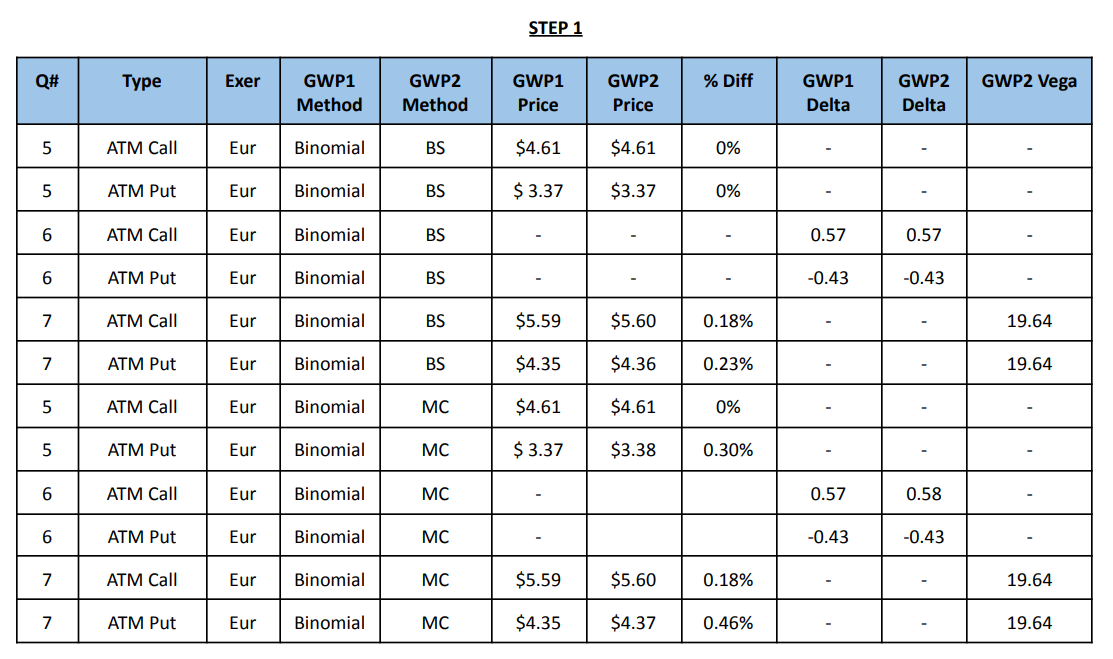

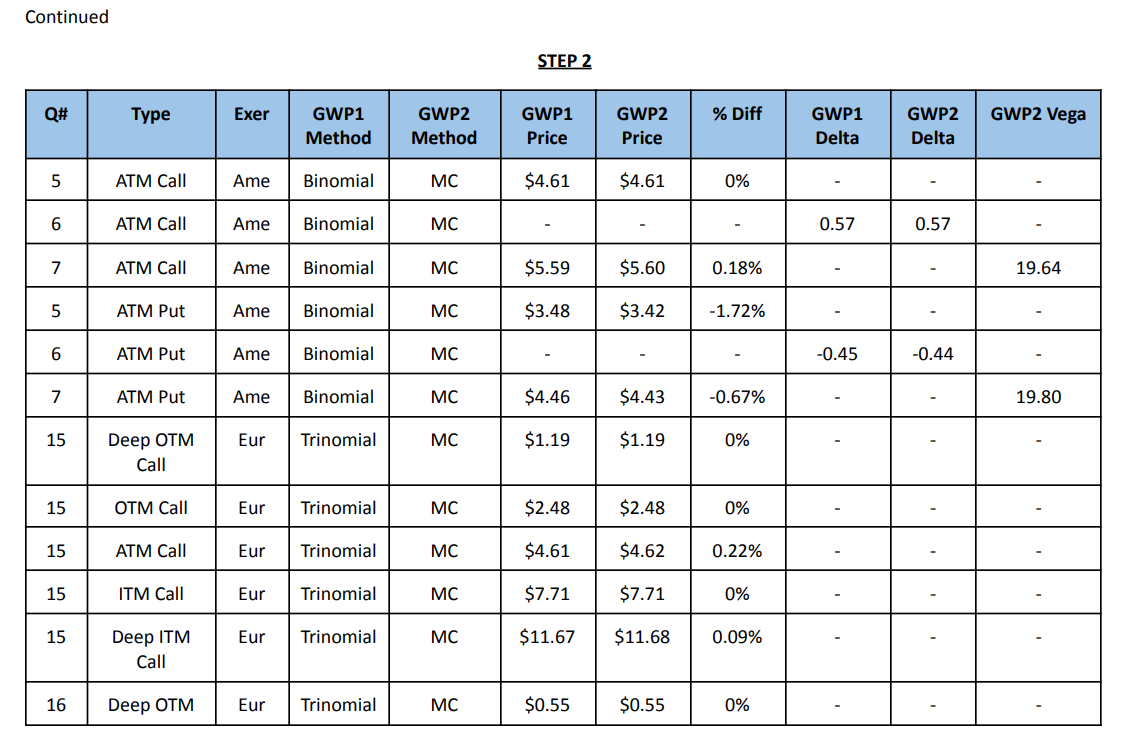

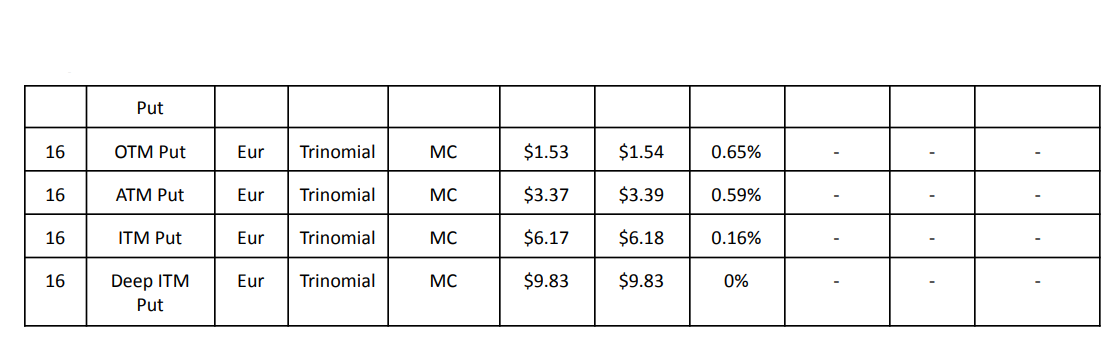

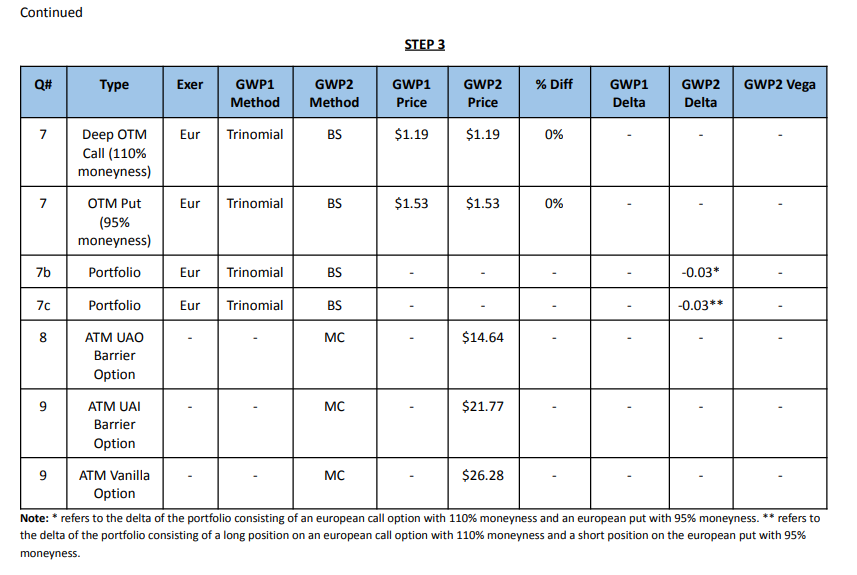

-----------

# **# Extra Alternatives for Pricing American Call and American Call and Put Options**


*   Alternative 1 using MC: Because early exercise is never optimal for non-paying dividends, we can price an american call option using the Monte Carlo Simulation for an european call
*   Alternative 2 using Least-Square Monte Carlo (LSMC): this is from a code implementing the LSMC proposed by Longstaff and Schwartz (2001) paper.

In [ ]:
#@title ### American Call Price Alternative 1

# Alternative 1: Because early exercise is never optimal for non-paying dividends, we can price an american call option using the Monte Carlo Simulation for an european call

def bs_call_mc(S, K, r, sigma, T, t, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    data[:, 1] = ST - K

    average = np.sum(np.amax(data, axis=1)) / float(Ite)

    return np.exp(-r * (T - t)) * average


T = 0.25
S0 = 100
K = 100
r = 0.05
sigma = 0.20
t = 0 #(present day)
# dividend yield assumed to be 0
Ite = 10000000

amecall = bs_call_mc(S0, K, r, sigma, T, t, Ite)
print("Monte Carlo Price for American Option is: $", round(amecall,2))

# If sigma increases to 25%:
amecall_sigma25 = bs_call_mc(S0, K, r, 0.25, T, t, Ite)
print("Monte Carlo Price for American Option with sigma equal to 25% is: $", round(amecall_sigma25,2))

Monte Carlo Price for American Option is: $ 4.61
Monte Carlo Price for American Option with sigma equal to 25% is: $ 5.6


In [ ]:
#@title ### American Call Price Alternative 2

# Alternative 2: Using the code for the Least-Square Monte Carlo
# from the following source: https://github.com/jpcolino/IPython_notebooks/blob/master/Least%20Square%20Monte%20Carlo%20Implementation%20in%20a%20Python%20Class.ipynb

import numpy as np

class AmericanOptionsLSMC(object):
    """ Class for American options pricing using Longstaff-Schwartz (2001):
    "Valuing American Options by Simulation: A Simple Least-Squares Approach."
    Review of Financial Studies, Vol. 14, 113-147.
    S0 : float : initial stock/index level
    strike : float : strike price
    T : float : time to maturity (in year fractions)
    M : int : grid or granularity for time (in number of total points)
    r : float : constant risk-free short rate
    div :    float : dividend yield
    sigma :  float : volatility factor in diffusion term

    """

    def __init__(self, option_type, S0, strike, T, M, r, div, sigma, simulations):
        try:
            self.option_type = option_type
            assert isinstance(option_type, str)
            self.S0 = float(S0)
            self.strike = float(strike)
            assert T > 0
            self.T = float(T)
            assert M > 0
            self.M = int(M)
            assert r >= 0
            self.r = float(r)
            assert div >= 0
            self.div = float(div)
            assert sigma > 0
            self.sigma = float(sigma)
            assert simulations > 0
            self.simulations = int(simulations)
        except ValueError:
            print('Error passing Options parameters')


        if option_type != 'call' and option_type != 'put':
            raise ValueError("Error: option type not valid. Enter 'call' or 'put'")
        if S0 < 0 or strike < 0 or T <= 0 or r < 0 or div < 0 or sigma < 0:
            raise ValueError('Error: Negative inputs not allowed')

        self.time_unit = self.T / float(self.M)
        self.discount = np.exp(-self.r * self.time_unit)

    @property
    def MCprice_matrix(self, seed = 123):
        """ Returns MC price matrix rows: time columns: price-path simulation """
        np.random.seed(seed)
        MCprice_matrix = np.zeros((self.M + 1, self.simulations), dtype=np.float64)
        MCprice_matrix[0,:] = self.S0
        for t in range(1, self.M + 1):
            brownian = np.random.standard_normal( self.simulations // 2)
            brownian = np.concatenate((brownian, -brownian))
            MCprice_matrix[t, :] = (MCprice_matrix[t - 1, :]
                                  * np.exp((self.r - self.sigma ** 2 / 2.) * self.time_unit
                                  + self.sigma * brownian * np.sqrt(self.time_unit)))
        return MCprice_matrix

    @property
    def MCpayoff(self):
        """Returns the inner-value of American Option"""
        if self.option_type == 'call':
            payoff = np.maximum(self.MCprice_matrix - self.strike,
                           np.zeros((self.M + 1, self.simulations),dtype=np.float64))
        else:
            payoff = np.maximum(self.strike - self.MCprice_matrix,
                            np.zeros((self.M + 1, self.simulations),
                            dtype=np.float64))
        return payoff

    @property
    def value_vector(self):
        value_matrix = np.zeros_like(self.MCpayoff)
        value_matrix[-1, :] = self.MCpayoff[-1, :]
        for t in range(self.M - 1, 0 , -1):
            regression = np.polyfit(self.MCprice_matrix[t, :], value_matrix[t + 1, :] * self.discount, 5)
            continuation_value = np.polyval(regression, self.MCprice_matrix[t, :])
            value_matrix[t, :] = np.where(self.MCpayoff[t, :] > continuation_value,
                                          self.MCpayoff[t, :],
                                          value_matrix[t + 1, :] * self.discount)

        return value_matrix[1,:] * self.discount


    @property
    def price(self): return np.sum(self.value_vector) / float(self.simulations)

    @property
    def delta(self):
        diff = self.S0 * 0.01
        myCall_1 = AmericanOptionsLSMC(self.option_type, self.S0 + diff,
                                       self.strike, self.T, self.M,
                                       self.r, self.div, self.sigma, self.simulations)
        myCall_2 = AmericanOptionsLSMC(self.option_type, self.S0 - diff,
                                       self.strike, self.T, self.M,
                                       self.r, self.div, self.sigma, self.simulations)
        return (myCall_1.price - myCall_2.price) / float(2. * diff)

    @property
    def gamma(self):
        diff = self.S0 * 0.01
        myCall_1 = AmericanOptionsLSMC(self.option_type, self.S0 + diff,
                                       self.strike, self.T, self.M,
                                       self.r, self.div, self.sigma, self.simulations)
        myCall_2 = AmericanOptionsLSMC(self.option_type, self.S0 - diff,
                                       self.strike, self.T, self.M,
                                       self.r, self.div, self.sigma, self.simulations)
        return (myCall_1.delta - myCall_2.delta) / float(2. * diff)

    @property
    def vega(self):
        diff = self.sigma * 0.01
        myCall_1 = AmericanOptionsLSMC(self.option_type, self.S0,
                                       self.strike, self.T, self.M,
                                       self.r, self.div, self.sigma + diff,
                                       self.simulations)
        myCall_2 = AmericanOptionsLSMC(self.option_type, self.S0,
                                       self.strike, self.T, self.M,
                                       self.r, self.div, self.sigma - diff,
                                       self.simulations)
        return (myCall_1.price - myCall_2.price) / float(2. * diff)

    @property
    def rho(self):
        diff = self.r * 0.01
        if (self.r - diff) < 0:
            myCall_1 = AmericanOptionsLSMC(self.option_type, self.S0,
                                       self.strike, self.T, self.M,
                                       self.r + diff, self.div, self.sigma,
                                       self.simulations)
            myCall_2 = AmericanOptionsLSMC(self.option_type, self.S0,
                                       self.strike, self.T, self.M,
                                       self.r, self.div, self.sigma,
                                       self.simulations)
            return (myCall_1.price - myCall_2.price) / float(diff)
        else:
            myCall_1 = AmericanOptionsLSMC(self.option_type, self.S0,
                                       self.strike, self.T, self.M,
                                       self.r + diff, self.div, self.sigma,
                                       self.simulations)
            myCall_2 = AmericanOptionsLSMC(self.option_type, self.S0,
                                       self.strike, self.T, self.M,
                                       self.r - diff, self.div, self.sigma,
                                       self.simulations)
            return (myCall_1.price - myCall_2.price) / float(2. * diff)

    @property
    def theta(self):
        diff = 1 / 252.
        myCall_1 = AmericanOptionsLSMC(self.option_type, self.S0,
                                       self.strike, self.T + diff, self.M,
                                       self.r, self.div, self.sigma,
                                       self.simulations)
        myCall_2 = AmericanOptionsLSMC(self.option_type, self.S0,
                                       self.strike, self.T - diff, self.M,
                                       self.r, self.div, self.sigma,
                                       self.simulations)
        return (myCall_2.price - myCall_1.price) / float(2. * diff)



In [ ]:
#@title #

# pip install xdoctest
#import doctest
#doctest.testmod()

# option_type, S0, strike, T, M, r, div, sigma, simulations
AmericanCALL = AmericanOptionsLSMC('call', 100, 100, 0.25, 90, 0.05, 0, 0.20, 100000 )
print('Price: ', round(AmericanCALL.price,2))

Price:  4.46


In [ ]:
#@title #

print('Delta: ', round(AmericanCALL.delta,2))

Delta:  0.57


In [ ]:
#@title #
print('Vega: ', round(AmericanCALL.vega,2))

Vega:  19.6


In [ ]:
#@title #
print('Gamma: ', round(AmericanCALL.gamma,2))

Gamma:  0.04


In [ ]:
# option_type, S0, strike, T, M, r, div, sigma, simulations
AmericanPUT = AmericanOptionsLSMC('put', 100, 100, 0.25, 90, 0.05, 0, 0.20, 100000 )
print('Price: ', round(AmericanPUT.price,2))

Price:  3.42


In [ ]:
#@title #
print('Gamma: ', round(AmericanPUT.gamma,2))

Gamma:  0.04
